In [1]:
%config Completer.use_jedi = False

In [2]:
from numpy import where
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [3]:
# Generate dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, 
                  random_state=1, cluster_std=3)

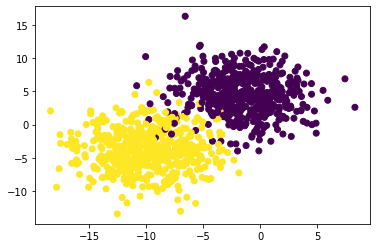

In [8]:
plt.scatter(X[:,0], X[:,1], c=y);

In [5]:
X.shape

(1000, 2)

In [22]:
# create a dataset with a given class distribution
def get_dataset(proportions):
    from numpy import vstack, hstack
    # determine the number of classes
    n_classes = len(proportions)
    # determine the number of examples to generate for each class
    largest = max([v for k,v in proportions.items()])
    n_samples = largest * n_classes
    # create dataset
    X, y = make_blobs(n_samples=n_samples, centers=n_classes, 
                      n_features=2, random_state=1,
                      cluster_std=4)
    # collect the examples
    X_list, y_list = list(), list()
    for k,v in proportions.items():
        row_ix = where(y == k)[0]
        selected = row_ix[:v]
        X_list.append(X[selected, :])
        y_list.append(y[selected])
    return vstack(X_list), hstack(y_list)

In [23]:
X, y = get_dataset({1:1000, 0:9000})

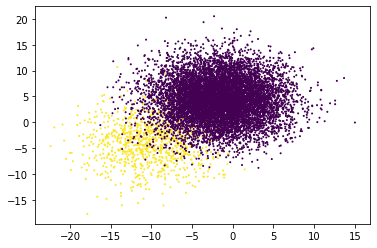

In [24]:
plt.scatter(X[:,0], X[:,1], c=y, s=1);

In [32]:
# scatter plot of dataset, different color for each class
def plot_dataset(X, y, **kwargs):
    from numpy import unique
    # create scatter plot for samples from each class
    n_classes = len(unique(y))
    for class_value in range(n_classes):
        # get row indexes for samples with this class
        row_ix = where(y == class_value)[0]
        # create scatter of these samples
        plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(class_value), **kwargs)
    # show a legend
    plt.legend()
    # show the plot
    plt.show()

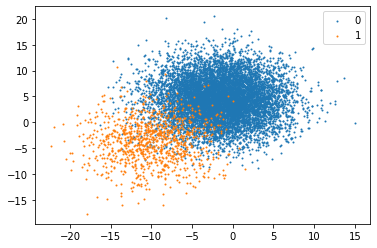

In [33]:
plot_dataset(X, y, s=1)